In [1]:
!pip install pandas seaborn numpy scipy torch torchvision tqdm sklearn 

^C


In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import neighbors

import warnings
import seaborn as sns

import math
import decimal

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'time', 'variable', 'value'], dtype='object')

In [4]:
df.head(30)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
5,6,AS14.01,2014-02-27 12:00:00.000,mood,6.0
6,7,AS14.01,2014-02-27 15:00:00.000,mood,7.0
7,8,AS14.01,2014-03-21 09:00:00.000,mood,6.0
8,9,AS14.01,2014-03-21 11:00:00.000,mood,6.0
9,10,AS14.01,2014-03-21 15:00:00.000,mood,7.0


In [5]:
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [6]:
df['id'].describe

<bound method NDFrame.describe of 0         AS14.01
1         AS14.01
2         AS14.01
3         AS14.01
4         AS14.01
           ...   
376907    AS14.30
376908    AS14.30
376909    AS14.30
376910    AS14.30
376911    AS14.32
Name: id, Length: 376912, dtype: object>

In [7]:
df['id'].value_counts()

AS14.01    21999
AS14.23    21852
AS14.13    19592
AS14.28    19276
AS14.06    18092
AS14.29    17499
AS14.12    17311
AS14.30    17279
AS14.26    16403
AS14.33    16390
AS14.07    16045
AS14.17    15826
AS14.05    15745
AS14.02    14581
AS14.27    14575
AS14.24    14430
AS14.03    14425
AS14.25    12589
AS14.31    11889
AS14.19    11397
AS14.32    11193
AS14.09    10886
AS14.14     9286
AS14.08     7902
AS14.16     3982
AS14.20     3620
AS14.15     2848
Name: id, dtype: int64

In [8]:
df['variable'].describe

<bound method NDFrame.describe of 0                   mood
1                   mood
2                   mood
3                   mood
4                   mood
               ...      
376907    appCat.weather
376908    appCat.weather
376909    appCat.weather
376910    appCat.weather
376911    appCat.weather
Name: variable, Length: 376912, dtype: object>

In [9]:
df['variable'].value_counts()

screen                  96578
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
activity                22965
appCat.social           19145
appCat.other             7650
circumplex.valence       5643
circumplex.arousal       5643
appCat.office            5642
mood                     5641
call                     5239
appCat.travel            2846
appCat.utilities         2487
sms                      1798
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: variable, dtype: int64

In [10]:
df['value'].describe

<bound method NDFrame.describe of 0          6.000
1          6.000
2          6.000
3          7.000
4          6.000
           ...  
376907     8.032
376908     3.008
376909     7.026
376910    23.033
376911    22.431
Name: value, Length: 376912, dtype: float64>

In [11]:
df['value'].value_counts()

 0.000      12728
 1.000      12434
 7.000       2592
 1.002       2068
-1.000       1901
            ...  
 108.571        1
 84.680         1
 80.649         1
 22.584         1
 180.009        1
Name: value, Length: 130606, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  376912 non-null  int64  
 1   id          376912 non-null  object 
 2   time        376912 non-null  object 
 3   variable    376912 non-null  object 
 4   value       376710 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


In [13]:
print("id:\n", set(df['id']),
     "\n\nvariable:\n", set(df['variable']))

id:
 {'AS14.33', 'AS14.16', 'AS14.17', 'AS14.20', 'AS14.07', 'AS14.06', 'AS14.08', 'AS14.24', 'AS14.12', 'AS14.02', 'AS14.27', 'AS14.13', 'AS14.28', 'AS14.30', 'AS14.01', 'AS14.14', 'AS14.26', 'AS14.03', 'AS14.05', 'AS14.32', 'AS14.23', 'AS14.29', 'AS14.19', 'AS14.31', 'AS14.09', 'AS14.25', 'AS14.15'} 

variable:
 {'appCat.entertainment', 'appCat.builtin', 'circumplex.valence', 'call', 'appCat.unknown', 'appCat.communication', 'appCat.social', 'screen', 'appCat.finance', 'appCat.utilities', 'appCat.office', 'sms', 'appCat.other', 'appCat.game', 'circumplex.arousal', 'appCat.weather', 'appCat.travel', 'mood', 'activity'}


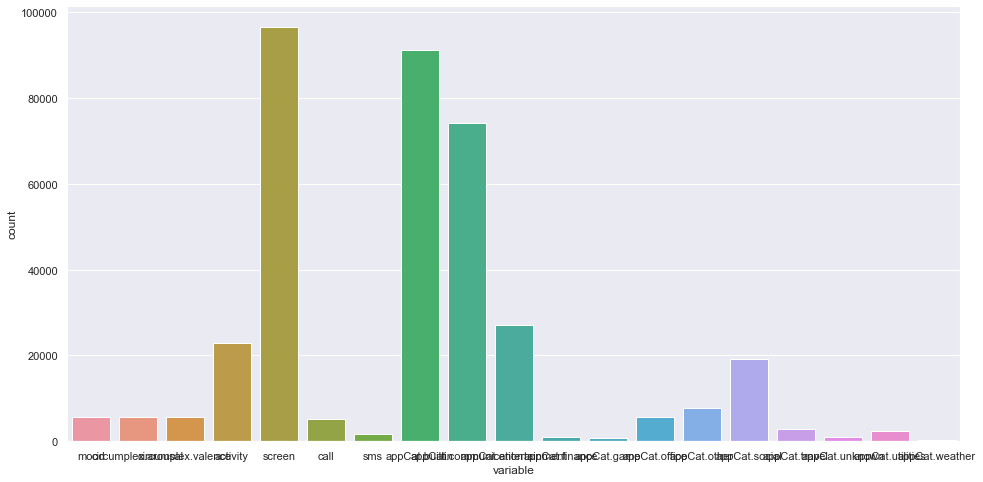

In [14]:
sns.countplot(df['variable'], data=df)

In [15]:
df.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [16]:
df.columns

Index(['Unnamed: 0', 'id', 'time', 'variable', 'value'], dtype='object')

In [17]:
df

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [18]:
df = df.drop(columns=(['Unnamed: 0']))

In [19]:
df

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [20]:
df

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [21]:
df['time'] = df['time'].astype('datetime64').dt.date

In [22]:
df

,id,time,variable,value
0,AS14.01,2014-02-26,mood,6.000
1,AS14.01,2014-02-26,mood,6.000
2,AS14.01,2014-02-26,mood,6.000
3,AS14.01,2014-02-26,mood,7.000
4,AS14.01,2014-02-27,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032
376908,AS14.30,2014-04-19,appCat.weather,3.008
376909,AS14.30,2014-04-26,appCat.weather,7.026
376910,AS14.30,2014-04-27,appCat.weather,23.033


In [23]:
df.groupby('time')

In [24]:
df

,id,time,variable,value
0,AS14.01,2014-02-26,mood,6.000
1,AS14.01,2014-02-26,mood,6.000
2,AS14.01,2014-02-26,mood,6.000
3,AS14.01,2014-02-26,mood,7.000
4,AS14.01,2014-02-27,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032
376908,AS14.30,2014-04-19,appCat.weather,3.008
376909,AS14.30,2014-04-26,appCat.weather,7.026
376910,AS14.30,2014-04-27,appCat.weather,23.033


In [25]:
def compute_avg_val(df):
    df['daily average'] = df['value'].mean()
    return df

def compute_sum_val(df):
    df['daily sum']  = df['value'].sum()
    return df

grouped = df.groupby(['time', 'id','variable'])
df = grouped.apply(compute_avg_val)
grouped = df.groupby(['time', 'id','variable'])
df = grouped.apply(compute_sum_val)


In [26]:
df

,id,time,variable,value,daily average,daily sum
0,AS14.01,2014-02-26,mood,6.000,6.250000,25.000
1,AS14.01,2014-02-26,mood,6.000,6.250000,25.000
2,AS14.01,2014-02-26,mood,6.000,6.250000,25.000
3,AS14.01,2014-02-26,mood,7.000,6.250000,25.000
4,AS14.01,2014-02-27,mood,6.000,6.333333,19.000
...,...,...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032,8.032000,8.032
376908,AS14.30,2014-04-19,appCat.weather,3.008,3.008000,3.008
376909,AS14.30,2014-04-26,appCat.weather,7.026,7.026000,7.026
376910,AS14.30,2014-04-27,appCat.weather,23.033,23.033000,23.033


In [27]:
df = df.drop_duplicates(subset=['time', 'id','variable'])

In [28]:
df

,id,time,variable,value,daily average,daily sum
0,AS14.01,2014-02-26,mood,6.000,6.250000,25.000
4,AS14.01,2014-02-27,mood,6.000,6.333333,19.000
7,AS14.01,2014-03-21,mood,6.000,6.200000,31.000
12,AS14.01,2014-03-22,mood,7.000,6.400000,32.000
17,AS14.01,2014-03-23,mood,7.000,6.800000,34.000
...,...,...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032,8.032000,8.032
376908,AS14.30,2014-04-19,appCat.weather,3.008,3.008000,3.008
376909,AS14.30,2014-04-26,appCat.weather,7.026,7.026000,7.026
376910,AS14.30,2014-04-27,appCat.weather,23.033,23.033000,23.033


In [29]:
df.head(50)

,id,time,variable,value,daily average,daily sum
0,AS14.01,2014-02-26,mood,6.0,6.250000,25.0
4,AS14.01,2014-02-27,mood,6.0,6.333333,19.0
7,AS14.01,2014-03-21,mood,6.0,6.200000,31.0
12,AS14.01,2014-03-22,mood,7.0,6.400000,32.0
17,AS14.01,2014-03-23,mood,7.0,6.800000,34.0
22,AS14.01,2014-03-24,mood,6.0,6.000000,30.0
27,AS14.01,2014-03-25,mood,6.0,6.750000,27.0
31,AS14.01,2014-03-26,mood,7.0,6.600000,33.0
36,AS14.01,2014-03-27,mood,7.0,7.000000,35.0
41,AS14.01,2014-03-28,mood,5.0,6.400000,32.0


In [30]:
df = df.drop(columns=(['value']))

In [31]:
df.loc[(df['id'] == 'AS14.01') & (df['time'].astype('datetime64') == '2014-02-26')]


,id,time,variable,daily average,daily sum
0,AS14.01,2014-02-26,mood,6.25,25.0
5641,AS14.01,2014-02-26,circumplex.arousal,-0.25,-1.0
11284,AS14.01,2014-02-26,circumplex.valence,0.75,3.0
136487,AS14.01,2014-02-26,call,1.00,1.0
141716,AS14.01,2014-02-26,sms,1.00,2.0


In [32]:
df

,id,time,variable,daily average,daily sum
0,AS14.01,2014-02-26,mood,6.250000,25.000
4,AS14.01,2014-02-27,mood,6.333333,19.000
7,AS14.01,2014-03-21,mood,6.200000,31.000
12,AS14.01,2014-03-22,mood,6.400000,32.000
17,AS14.01,2014-03-23,mood,6.800000,34.000
...,...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032000,8.032
376908,AS14.30,2014-04-19,appCat.weather,3.008000,3.008
376909,AS14.30,2014-04-26,appCat.weather,7.026000,7.026
376910,AS14.30,2014-04-27,appCat.weather,23.033000,23.033


In [33]:
variables_to_average = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']
variables_to_sum = ['screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment',
                   'appCat.finance', 'appCat.game', 'appCat.office','appCat.other', 'appCat.social', 'appCat.travel',
                   'appCat.unknown', 'appCat.utilities', 'appCat.weather']

for var in variables_to_average:
    df3 = df.loc[df['variable'] == var]
    df[var]=df3['daily average'].astype(float) 
    
for var in variables_to_sum:
    df3 = df.loc[df['variable'] == var]
    df[var]=df3['daily sum'].astype(float)   

In [34]:
df

,id,time,variable,daily average,daily sum,mood,circumplex.arousal,circumplex.valence,activity,screen,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-26,mood,6.250000,25.000,6.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-27,mood,6.333333,19.000,6.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-03-21,mood,6.200000,31.000,6.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,AS14.01,2014-03-22,mood,6.400000,32.000,6.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AS14.01,2014-03-23,mood,6.800000,34.000,6.800000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032000,8.032,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.032
376908,AS14.30,2014-04-19,appCat.weather,3.008000,3.008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.008
376909,AS14.30,2014-04-26,appCat.weather,7.026000,7.026,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.026
376910,AS14.30,2014-04-27,appCat.weather,23.033000,23.033,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.033


In [35]:
df3

,id,time,variable,daily average,daily sum,mood,circumplex.arousal,circumplex.valence,activity,screen,...,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities
376657,AS14.01,2014-03-23,appCat.weather,30.386000,30.386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376658,AS14.03,2014-03-23,appCat.weather,44.854000,44.854,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376659,AS14.03,2014-03-30,appCat.weather,15.977500,31.955,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376661,AS14.06,2014-03-30,appCat.weather,1.619667,4.859,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376664,AS14.06,2014-04-09,appCat.weather,1.007000,1.007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032000,8.032,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376908,AS14.30,2014-04-19,appCat.weather,3.008000,3.008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376909,AS14.30,2014-04-26,appCat.weather,7.026000,7.026,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376910,AS14.30,2014-04-27,appCat.weather,23.033000,23.033,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_grouped = df.groupby(['time', 'id'])

In [37]:
df_grouped.head(30)

,id,time,variable,daily average,daily sum,mood,circumplex.arousal,circumplex.valence,activity,screen,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-26,mood,6.250000,25.000,6.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-27,mood,6.333333,19.000,6.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-03-21,mood,6.200000,31.000,6.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,AS14.01,2014-03-22,mood,6.400000,32.000,6.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AS14.01,2014-03-23,mood,6.800000,34.000,6.800000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,AS14.30,2014-04-11,appCat.weather,8.032000,8.032,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.032
376908,AS14.30,2014-04-19,appCat.weather,3.008000,3.008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.008
376909,AS14.30,2014-04-26,appCat.weather,7.026000,7.026,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.026
376910,AS14.30,2014-04-27,appCat.weather,23.033000,23.033,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.033


In [38]:
df.head(30)

,id,time,variable,daily average,daily sum,mood,circumplex.arousal,circumplex.valence,activity,screen,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-26,mood,6.250000,25.0,6.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-27,mood,6.333333,19.0,6.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-03-21,mood,6.200000,31.0,6.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,AS14.01,2014-03-22,mood,6.400000,32.0,6.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AS14.01,2014-03-23,mood,6.800000,34.0,6.800000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,AS14.01,2014-03-24,mood,6.000000,30.0,6.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,AS14.01,2014-03-25,mood,6.750000,27.0,6.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,AS14.01,2014-03-26,mood,6.600000,33.0,6.600000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,AS14.01,2014-03-27,mood,7.000000,35.0,7.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,AS14.01,2014-03-28,mood,6.400000,32.0,6.400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df['time'] = pd.to_datetime(df['time'])

In [40]:
df = df.drop(columns=(['variable', 'daily average', 'daily sum']))

In [41]:
df

,id,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-26,6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-27,6.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-03-21,6.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,AS14.01,2014-03-22,6.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AS14.01,2014-03-23,6.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,AS14.30,2014-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.032
376908,AS14.30,2014-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.008
376909,AS14.30,2014-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.026
376910,AS14.30,2014-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.033


In [42]:
#drop rows with more than 0 Nan values
df_new = df.loc[df.isnull().sum(axis=1)<1]

In [43]:
df_new


,id,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather


In [44]:
df

,id,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-26,6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-27,6.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-03-21,6.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,AS14.01,2014-03-22,6.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AS14.01,2014-03-23,6.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,AS14.30,2014-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.032
376908,AS14.30,2014-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.008
376909,AS14.30,2014-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.026
376910,AS14.30,2014-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.033


In [45]:
#group by sample number
df_grouped = df.groupby((['id', 'time']), as_index=False).max()

In [46]:
#drop rows with more than 18 Nan values
df_new = df_grouped.loc[df_grouped.isnull().sum(axis=1)<18]

In [47]:
df_new.head(n)

,id,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-02-26,6.250000,-0.25,0.750000,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AS14.01,2014-02-27,6.333333,0.00,0.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_new.loc[df_new['id'] == 'AS14.01']

,id,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AS14.01,2014-02-26,6.250000,-0.250000,0.750000,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AS14.01,2014-02-27,6.333333,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AS14.01,2014-03-12,NaN,NaN,NaN,NaN,NaN,7.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,AS14.01,2014-03-14,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,AS14.01,2014-03-18,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,AS14.01,2014-03-20,NaN,NaN,NaN,0.081548,2275.944000,1.0,NaN,248.979,...,350.856,NaN,NaN,NaN,11.345,807.731,NaN,45.173,21.074,NaN
26,AS14.01,2014-03-21,6.200000,0.200000,0.200000,0.134050,17978.907000,6.0,NaN,3139.218,...,1007.456,49.544,NaN,172.206,239.751,4508.500,915.445,NaN,598.754,NaN


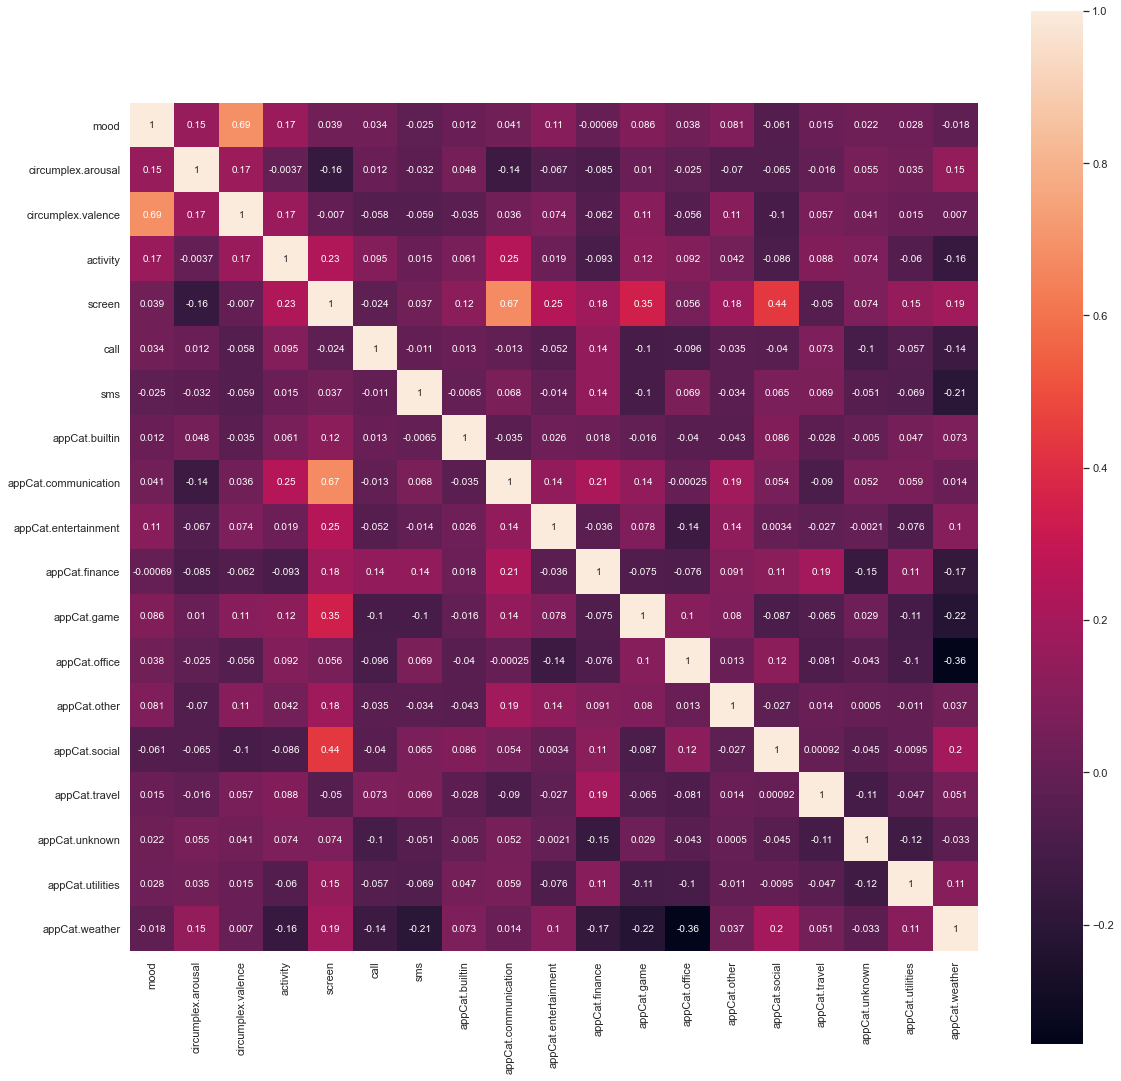

In [49]:
cols = df_new.columns
corrmat = df_new[cols].corr()
fig, ax = plt.subplots(figsize=(19,19)) 
sns.heatmap(corrmat, square=True, annot=True, ax = ax)

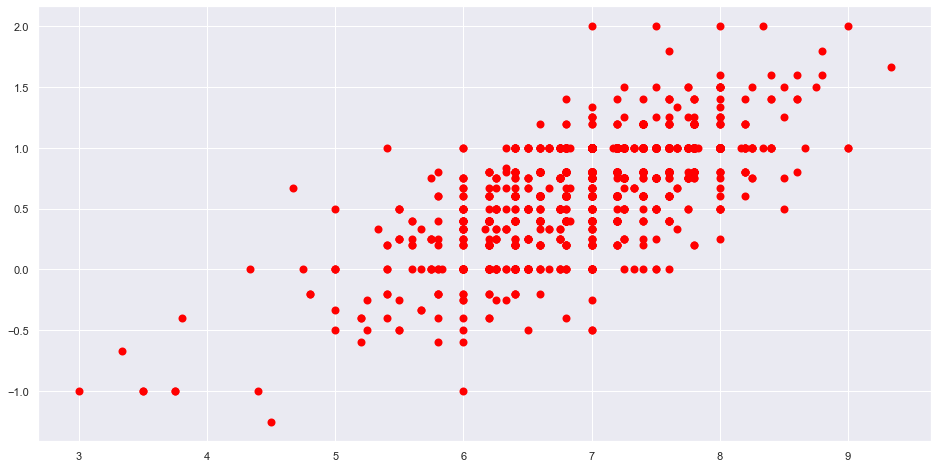

In [50]:
plt.scatter(df_new['mood'],df_new['circumplex.valence'], color='red', linewidth=2)

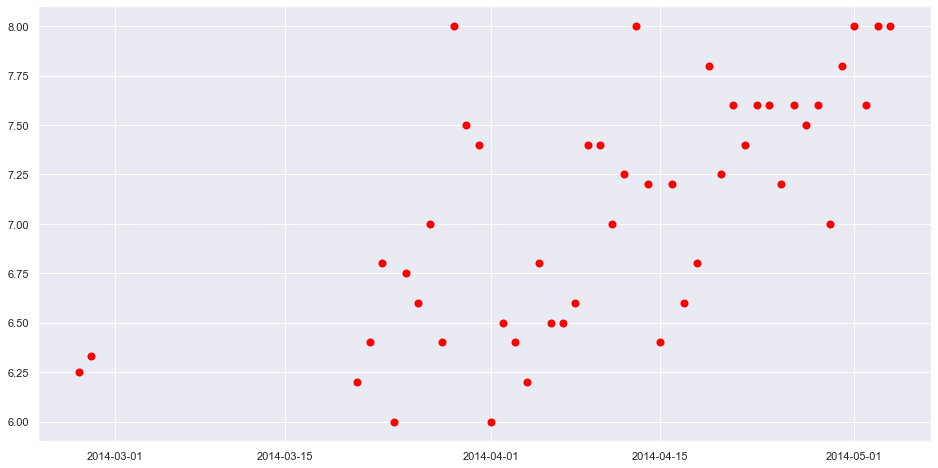

In [51]:
plt.scatter(df_new.loc[df_new['id'] == 'AS14.01', 'time'],df_new.loc[df_new['id'] == 'AS14.01', 'mood'], color='red', linewidth=2)

In [52]:
df_new = df_new.reset_index().drop(columns=(['index']))

In [53]:
df_new

,id,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-26,6.250000,-0.250000,0.750000,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-27,6.333333,0.000000,0.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,AS14.33,2014-05-27,6.200000,-0.600000,0.400000,0.012704,4089.879001,1.0,2.0,726.391,...,124.694,NaN,NaN,NaN,142.686,2010.364,NaN,NaN,56.173,NaN
1514,AS14.33,2014-05-28,8.200000,0.000000,1.200000,0.103301,14320.867998,10.0,1.0,2551.046,...,614.706,NaN,NaN,357.909,529.946,5361.211,NaN,NaN,30.666,NaN
1515,AS14.33,2014-05-29,7.000000,-1.333333,1.000000,0.169354,3569.341000,5.0,1.0,400.034,...,136.738,NaN,NaN,NaN,29.202,1789.922,0.939,NaN,3.199,NaN
1516,AS14.33,2014-05-30,6.800000,-0.800000,-0.400000,0.192901,9497.646999,4.0,NaN,3044.030,...,260.220,NaN,NaN,NaN,52.610,3166.409,1052.648,8.072,232.825,NaN


In [54]:
df_new['next_day'] = pd.DatetimeIndex(df_new.time) + pd.DateOffset(1) 

# set mood_next_day for rows where next row is next day
filter_df = df_new['next_day'] == df_new['time'].shift(-1) 
df_new.loc[filter_df, "mood_next_day"] = df_new['mood'].copy().shift(-1) 

In [55]:
df_new[['id', 'time', 'next_day', 'mood', 'mood_next_day']].head(20)

,id,time,next_day,mood,mood_next_day
0,AS14.01,2014-02-19,2014-02-20,NaN,NaN
1,AS14.01,2014-02-20,2014-02-21,NaN,NaN
2,AS14.01,2014-02-22,2014-02-23,NaN,NaN
3,AS14.01,2014-02-26,2014-02-27,6.250000,6.333333
4,AS14.01,2014-02-27,2014-02-28,6.333333,NaN
5,AS14.01,2014-03-12,2014-03-13,NaN,NaN
6,AS14.01,2014-03-14,2014-03-15,NaN,NaN
7,AS14.01,2014-03-18,2014-03-19,NaN,NaN
8,AS14.01,2014-03-20,2014-03-21,NaN,6.200000
9,AS14.01,2014-03-21,2014-03-22,6.200000,6.400000


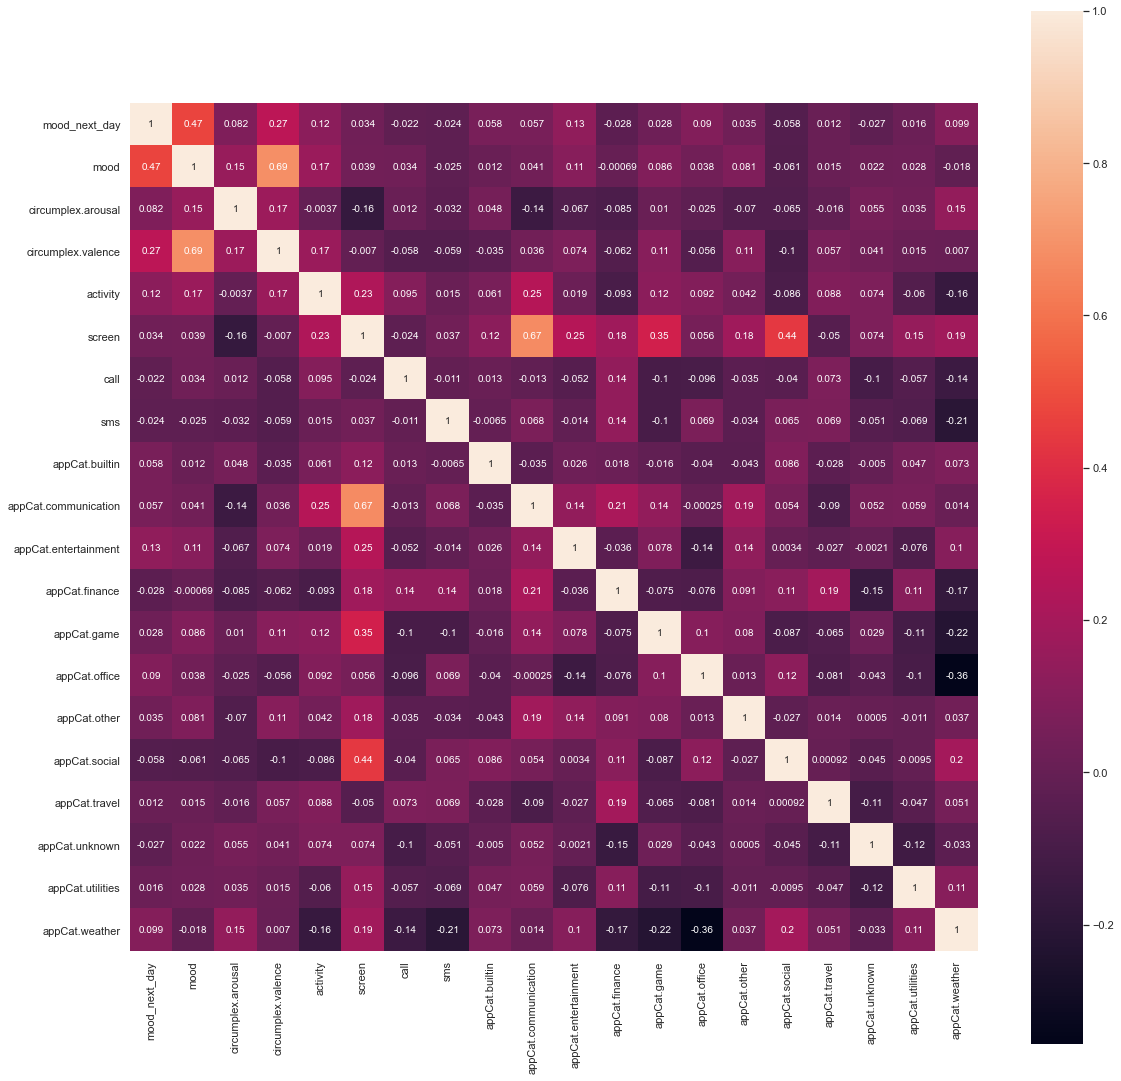

In [56]:
# reorder
mood_next_day = df_new['mood_next_day']
df_new.drop(labels=['mood_next_day'], axis=1,inplace = True)
df_new.insert(2, 'mood_next_day', mood_next_day)

# corr
cols = df_new.columns
corrmat = df_new[cols].corr()
fig, ax = plt.subplots(figsize=(19,19)) 
sns.heatmap(corrmat, square=True, annot=True, ax = ax)
fig.savefig('lala.png')

In [57]:
# types of days
df_new['next_day_weekday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x < 4 or x == 6 else 0)
df_new['weekday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)
df_new['monday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x == 0 else 0)
df_new['tuesday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x == 1 else 0)
df_new['wednesday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x == 2 else 0)
df_new['thursday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x == 3 else 0)
df_new['friday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x == 4 else 0)
df_new['saturday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x == 5 else 0)
df_new['sunday'] = df_new['time'].dt.dayofweek.apply(lambda x: 1 if x == 6 else 0)
df_new['month'] = df_new['time'].dt.month
df_new

,id,time,mood_next_day,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,next_day_weekday,weekday,monday,tuesday,wednesday,thursday,friday,saturday,sunday,month
0,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,...,1,1,0,0,1,0,0,0,0,2
1,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,...,1,1,0,0,0,1,0,0,0,2
2,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,0,0,0,0,0,0,0,1,0,2
3,AS14.01,2014-02-26,6.333333,6.250000,-0.250000,0.750000,NaN,NaN,1.0,2.0,...,1,1,0,0,1,0,0,0,0,2
4,AS14.01,2014-02-27,NaN,6.333333,0.000000,0.333333,NaN,NaN,NaN,NaN,...,1,1,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,AS14.33,2014-05-27,8.200000,6.200000,-0.600000,0.400000,0.012704,4089.879001,1.0,2.0,...,1,1,0,1,0,0,0,0,0,5
1514,AS14.33,2014-05-28,7.000000,8.200000,0.000000,1.200000,0.103301,14320.867998,10.0,1.0,...,1,1,0,0,1,0,0,0,0,5
1515,AS14.33,2014-05-29,6.800000,7.000000,-1.333333,1.000000,0.169354,3569.341000,5.0,1.0,...,1,1,0,0,0,1,0,0,0,5
1516,AS14.33,2014-05-30,7.000000,6.800000,-0.800000,-0.400000,0.192901,9497.646999,4.0,NaN,...,0,1,0,0,0,0,1,0,0,5


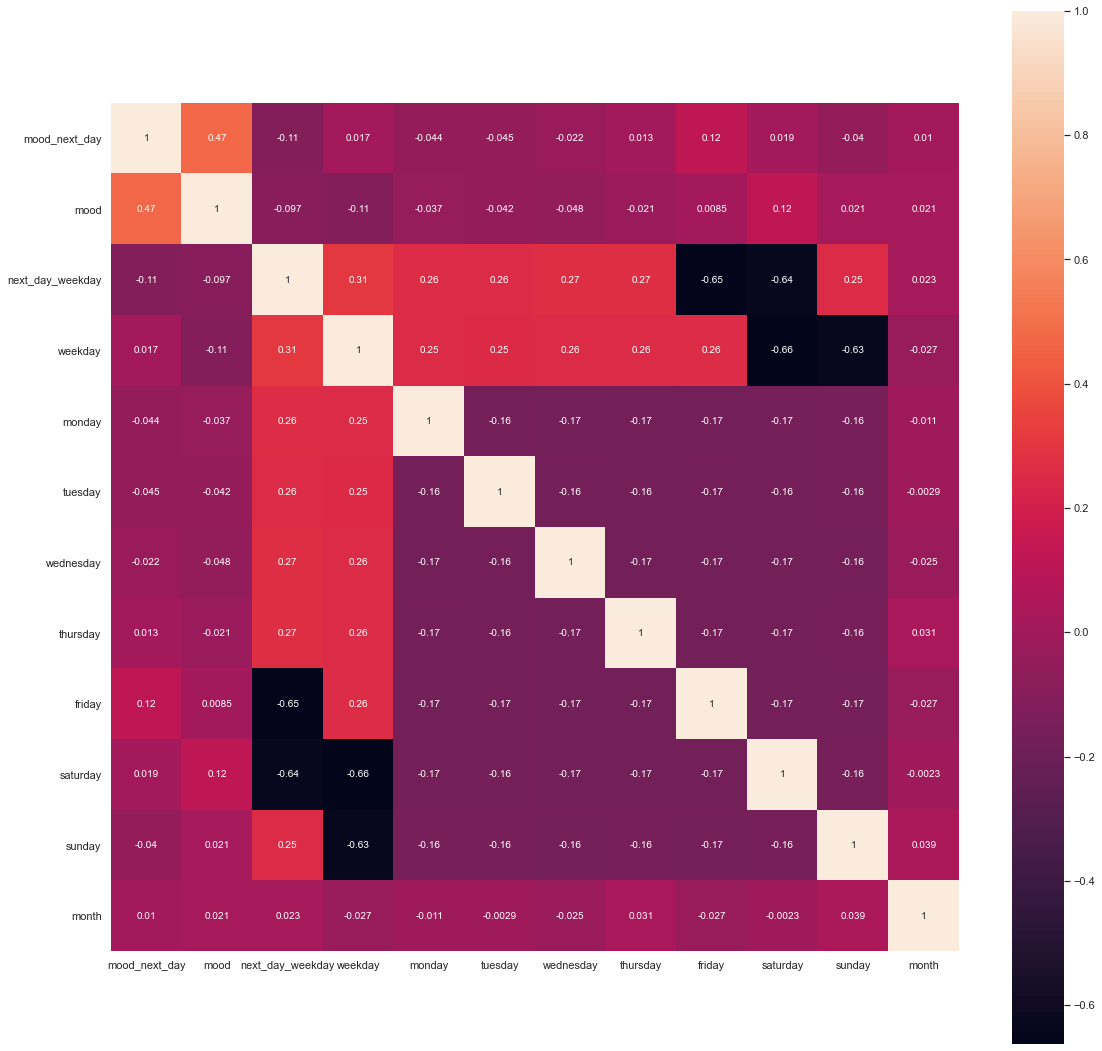

In [58]:
# corr
corrmat = df_new.iloc[:, [2, 3, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]].corr()
fig, ax = plt.subplots(figsize=(19,19)) 
sns.heatmap(corrmat, square=True, annot=True, ax = ax)
fig.savefig('typesofdays.png')

In [59]:
# groupings test.A.fillna(0) + test.B.fillna(0)/2 - test.C.fillna(0)/3 + test.D.fillna(0)
def group_attributes(df, new_col, cols, method="sum"):
    if method == "sum":
        df[new_col] = df[cols].sum(axis=1)
    if method == "avg":
        df[new_col] = df[cols].mean(axis=1)
    #if method == "mul":
        #idk
        
        
    df[new_col].replace(0, np.nan, inplace=True)

    return df

df = df_new.copy()

# sum
df = group_attributes(df, 'c_s', ['call', 'sms'])
df = group_attributes(df, 'fun', ['appCat.game', 'appCat.entertainment'])
df = group_attributes(df, 'idk', ['appCat.other', 'appCat.unknown', 'appCat.utilities'])
df = group_attributes(df, 'serious', ['appCat.finance', 'appCat.office'])
df = group_attributes(df, 'talk', ['appCat.social', 'appCat.communication'])
df = group_attributes(df, 'all', ['appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance',
                                'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 
                                'appCat.unknown','appCat.utilities'])
df = group_attributes(df, 'good', ['appCat.travel', 'appCat.communication', 'appCat.game'])
df = group_attributes(df, 'bad', ['appCat.office', 'appCat.finance', 'appCat.social'])

# multiply
#df = group_attributes(df, 'cva', ['circumplex.arousal', 'circumplex.valence'], method="mul")

df.isnull().sum()*100/df_new.shape[0]

id                       0.000000
time                     0.000000
mood_next_day           17.588933
mood                    16.469038
circumplex.arousal      16.469038
circumplex.valence      16.600791
activity                21.870883
screen                  20.487484
call                    35.968379
sms                     57.378129
appCat.builtin          21.277997
appCat.communication    22.068511
appCat.entertainment    44.005270
appCat.finance          86.363636
appCat.game             87.285903
appCat.office           81.818182
appCat.other            26.218709
appCat.social           34.914361
appCat.travel           71.739130
appCat.unknown          82.608696
appCat.utilities        71.475626
appCat.weather          92.555995
next_day                 0.000000
next_day_weekday         0.000000
weekday                  0.000000
monday                   0.000000
tuesday                  0.000000
wednesday                0.000000
thursday                 0.000000
friday        

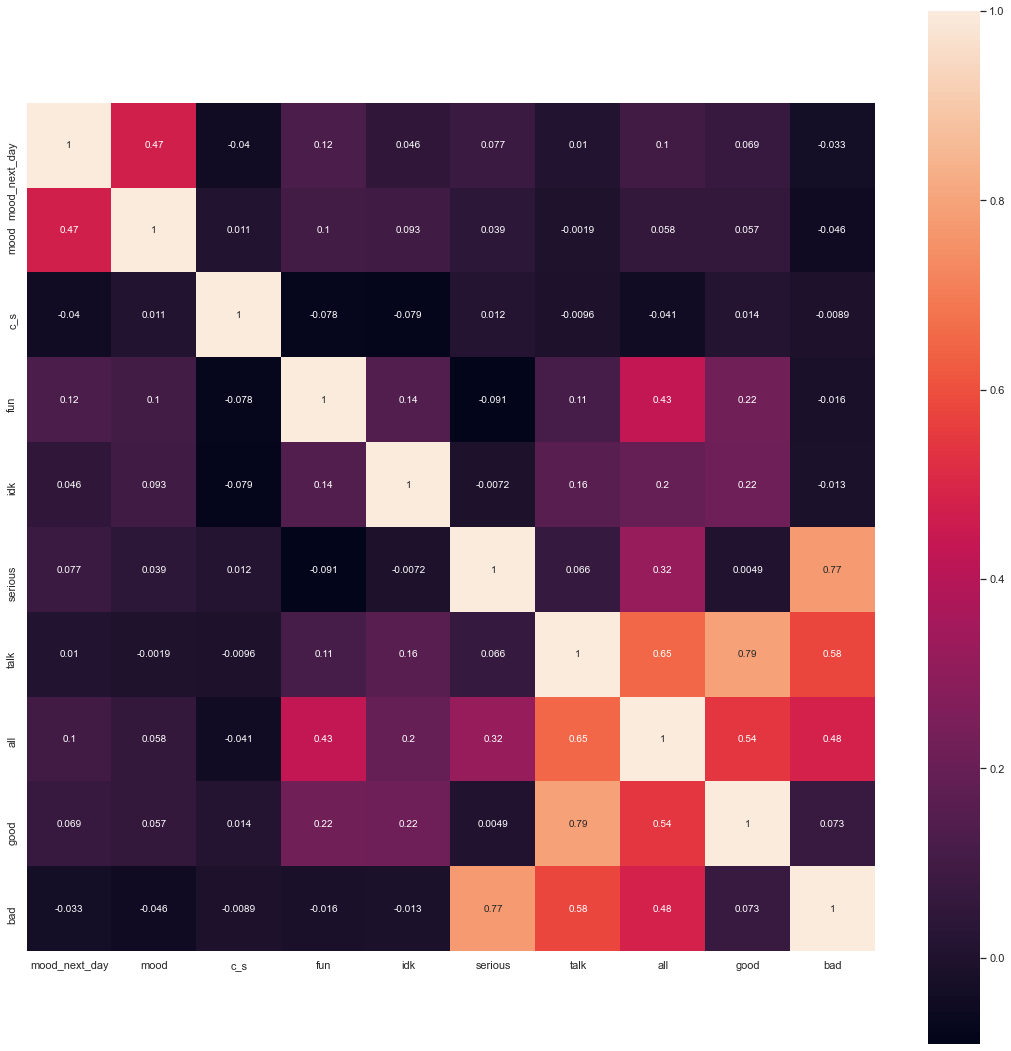

In [60]:
# corr
corrmat = df.iloc[:, [2, 3, 33, 34, 35, 36, 37, 38, 39, 40]].corr()
fig, ax = plt.subplots(figsize=(19,19)) 
sns.heatmap(corrmat, square=True, annot=True, ax = ax)
fig.savefig('grouped.png')

In [87]:
def make_time_windows(df, window):
    """ given a dataframe, column names and a window period, aggregate the columns by doing a rolling average
        over the window period """
    
    dfs_window = []
    
    for person in df['id'].unique():
        
        # get personal rows
        df_i = df.loc[df['id'] == person]
        df_i.index = df_i['time']
        
        ###### debug 
        if person == "AS14.01": print(df_i[['id', 'time', 'mood', 'mood_next_day', 'call', 'sms', 'activity']])
        
        # columns we do not want to average: id, mood, mood_next_day (possibly valence and arousal)
        df_keep = df_i[['id', 'time', 'mood', 'mood_next_day']]
        df_roll = df_i.copy()
        df_roll.drop(labels=['id', 'time', 'mood', 'mood_next_day',], axis=1, inplace=True)
        
        # rolling average
        df_roll = df_roll.rolling(window=window, min_periods=window).mean() #### TODO: missing row handling. Adjusted by min_periods=1
        
        ###### debug 
        if person == "AS14.01": print(df_roll[['call', 'sms', 'activity']])
            
        # combine
        df_i = pd.concat([df_keep, df_roll], axis=1)
        df_i = df_i.iloc[window-1:, :] # first row(s) are unusable by definition   
        
        ###### debug 
        if person == "AS14.01": print(df_i[['id', 'time', 'mood', 'mood_next_day', 'call', 'sms', 'activity']])
            
        dfs_window.append(df_i)
    
    result = pd.concat(dfs_window, ignore_index=True)
    return result

df_period2 = make_time_windows(df_new, 2)

                 id       time      mood  mood_next_day  call  sms  activity
time                                                                        
2014-02-19  AS14.01 2014-02-19       NaN            NaN   7.0  2.0       NaN
2014-02-20  AS14.01 2014-02-20       NaN            NaN   2.0  3.0       NaN
2014-02-22  AS14.01 2014-02-22       NaN            NaN   2.0  1.0       NaN
2014-02-26  AS14.01 2014-02-26  6.250000       6.333333   1.0  2.0       NaN
2014-02-27  AS14.01 2014-02-27  6.333333            NaN   NaN  NaN       NaN
2014-03-12  AS14.01 2014-03-12       NaN            NaN   7.0  1.0       NaN
2014-03-14  AS14.01 2014-03-14       NaN            NaN   3.0  1.0       NaN
2014-03-18  AS14.01 2014-03-18       NaN            NaN   1.0  2.0       NaN
2014-03-20  AS14.01 2014-03-20       NaN       6.200000   1.0  NaN  0.081548
2014-03-21  AS14.01 2014-03-21  6.200000       6.400000   6.0  NaN  0.134050
2014-03-22  AS14.01 2014-03-22  6.400000       6.800000   3.0  1.0  0.236880

In [154]:
df_period5 = make_time_windows(df_new, 5)

                 id       time      mood  mood_next_day  call  sms  activity
time                                                                        
2014-02-19  AS14.01 2014-02-19       NaN            NaN   7.0  2.0       NaN
2014-02-20  AS14.01 2014-02-20       NaN            NaN   2.0  3.0       NaN
2014-02-22  AS14.01 2014-02-22       NaN            NaN   2.0  1.0       NaN
2014-02-26  AS14.01 2014-02-26  6.250000       6.333333   1.0  2.0       NaN
2014-02-27  AS14.01 2014-02-27  6.333333            NaN   NaN  NaN       NaN
2014-03-12  AS14.01 2014-03-12       NaN            NaN   7.0  1.0       NaN
2014-03-14  AS14.01 2014-03-14       NaN            NaN   3.0  1.0       NaN
2014-03-18  AS14.01 2014-03-18       NaN            NaN   1.0  2.0       NaN
2014-03-20  AS14.01 2014-03-20       NaN       6.200000   1.0  NaN  0.081548
2014-03-21  AS14.01 2014-03-21  6.200000       6.400000   6.0  NaN  0.134050
2014-03-22  AS14.01 2014-03-22  6.400000       6.800000   3.0  1.0  0.236880

In [89]:
df_period2

,id,time,mood,mood_next_day,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,weekday,friday
0,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,4.5,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,AS14.01,2014-02-26,6.250000,6.333333,NaN,NaN,NaN,NaN,1.5,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,AS14.01,2014-02-27,6.333333,NaN,-0.125000,0.541667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,AS14.01,2014-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,AS14.33,2014-05-27,6.200000,8.200000,-0.500000,0.200000,0.063953,207.003780,5.5,2.5,...,NaN,NaN,17.340625,80.652652,NaN,NaN,NaN,NaN,1.0,0.0
1487,AS14.33,2014-05-28,8.200000,7.000000,-0.300000,0.800000,0.058003,113.632716,5.5,1.5,...,NaN,NaN,22.863822,74.770393,NaN,NaN,11.917667,NaN,1.0,0.0
1488,AS14.33,2014-05-29,7.000000,6.800000,-0.666667,1.100000,0.136328,116.317858,7.5,1.0,...,NaN,NaN,18.812947,149.080954,NaN,NaN,3.355250,NaN,1.0,0.0
1489,AS14.33,2014-05-30,6.800000,7.000000,-1.066667,0.300000,0.181128,102.660139,4.5,NaN,...,NaN,NaN,10.128000,137.135456,19.266786,NaN,8.560583,NaN,1.0,0.5


In [157]:
# dfs_person_time = []
# for person in df['id'].unique():
#     # personal df
#     df_time_person = df_time.loc[df_time['id'] == 'AS14.01']
    
#     # what should be next day?
#     df_time_person['next_day'] = pd.DatetimeIndex(df_time_person.time) + pd.DateOffset(1) 
    
#     # check whether next row == next day
#     filter_time = df_time_person['next_day'] != df_time_person['time'].shift(-1) 
    
#     # for all instances where next row != next day, print how many day breaks
#     df_time_person.loc[filter_time, "days break"] = df_time_person['time'].copy().shift(-1) - df_time_person['time']
    
#     dfs_person_time.append(df_time_person)
    
# df_time = pd.concat(dfs_person_time, ignore_index=True)
# df_time

# print(df_time['days break'].notnull().sum()) # next row != next day
# print(df_time['days break'].isnull().sum()) # next row == next day
# df_breaks = df_time.loc[df_time['days break'].notnull()]